# Statistics and Histograms

## Review of Statistics

If you have taken a course in quantum mechanics, statistical mechanics, or any stats course, much of this section will be a review. Skim through it quickly just to check for notation issues and then slow down at the next section about rare events.

We start with probability distribution functions. These can be discrete ($P(x_i)$) or continuous ($P(x)$). By discrete we mean something like the results of flipping a coin ten times; you cannot get 3.7 heads, only integer values are possible. continuous functions are common in quantum mechanics.

We will only deal with *normalized* functions. That is to say, we will assume that the functions have been changed such that $\sum_i P(x_i) = 1$ or $\int_{-\infty}^{+\infty} P(x)\, dx =1$. This means that the probability of there being some outcome is 1 (or 100%). When we plot histograms of repeating an experiment $N$ times, we will typically plot $N \times P(x_i)$ as the theoretical curve since that makes the sum of events be $N$ as we would expect.

The mean $\bar{x}$ value (or expectation value) of a given probability curve is given by 

$ \bar{x} = \sum_i x_i P(x_i)$ or $ \bar{x} =\int_{-\infty}^{+\infty} x P(x)\, dx.$

Note that these definitions are simpler than the usual ones because $P$ is already normalized.
The standard deviation of the given probability curve is given by

$\sigma^2 = \sum_i (x_i-\bar{x})^2 P(x_i) $ or $\sigma^2 =\int_{-\infty}^{+\infty} (x-\bar{x})^2 P(x)\, dx.$

If you have a set of data ${x_i}$ and you find the mean and the standard deviation, you have 2 simple, numerical values which attempt to characterize your data by treating your data as if it were a normal (Gaussian) distribution with the given mean and standard deviation. The normal distribution function is

$P(x) = \frac{1}{\sigma \sqrt{2 \pi}} \mathrm{e}^{-\frac{(x-\bar{x})^2}{2\sigma^2}}.$

Here is some Python code which shows the good, the bad, and the ugly of using the mean and the standard deviation to characterize various data sets.

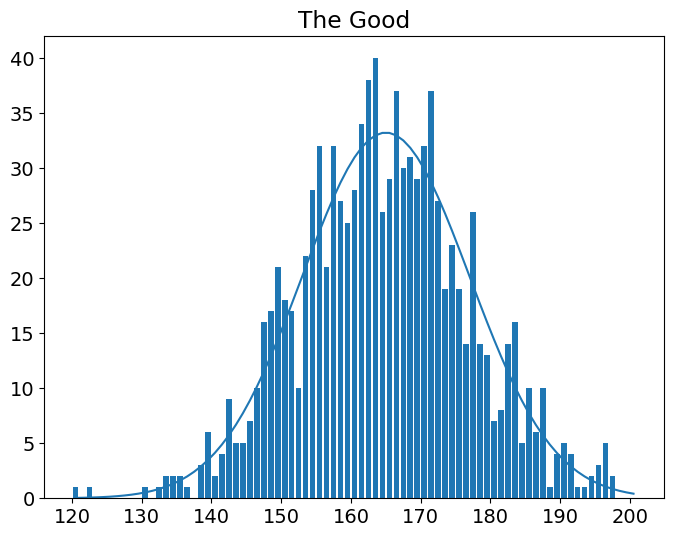

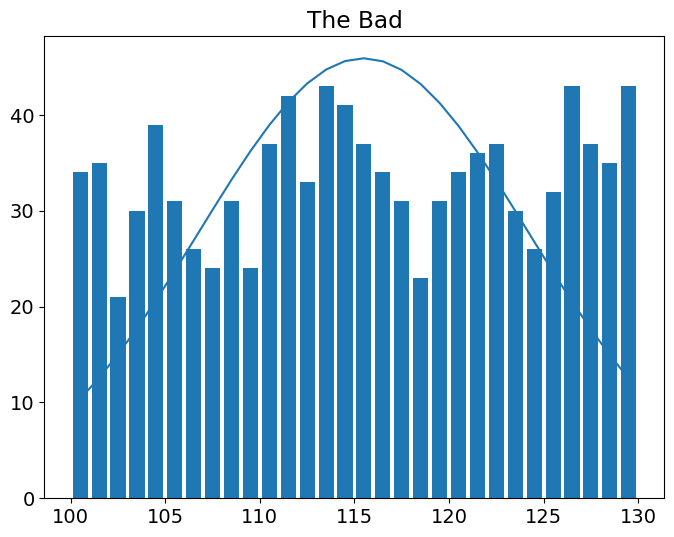

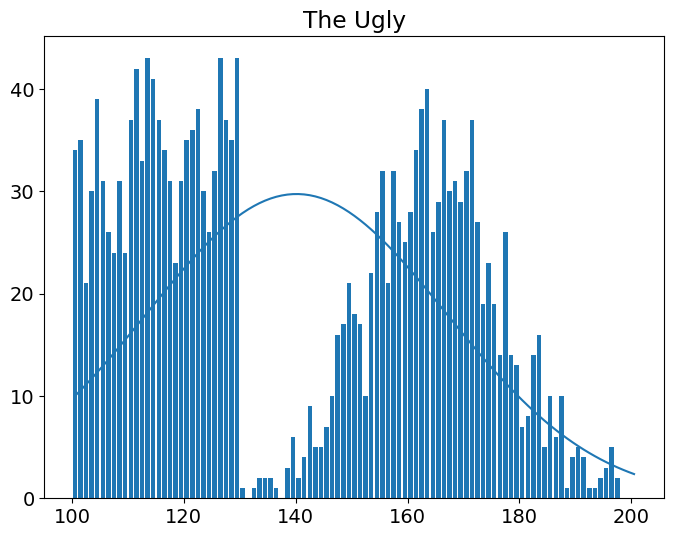

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import scipy.stats as stats

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 8,6

mean=165
stdev=12
number=1000
population1 = np.random.normal(mean, stdev, number)
start=int(min(population1))
stop=int(max(population1))+1
bins=np.arange(start,stop)

counts, bin_left = np.histogram(population1, bins=bins)
bin_centres = 0.5*(bin_left[1:]+bin_left[:-1])
plt.bar(bin_centres, counts)
plt.plot(bin_centres, number*stats.norm.pdf(bin_centres,mean,stdev))
plt.title("The Good")
plt.show()

a=100
b=130
population2 = np.random.uniform(a,b,number)
bins=np.arange(a,b+1)

counts, bin_left = np.histogram(population2, bins=bins)
bin_centres = 0.5*(bin_left[1:]+bin_left[:-1])
plt.bar(bin_centres, counts)
plt.plot(bin_centres, number*stats.norm.pdf(bin_centres,np.mean(population2),np.std(population2)))
plt.title("The Bad")
plt.show()

population3 = np.append(population1,population2)
start=int(min(population3))
stop=int(max(population3))+1
bins=np.arange(start,stop)

counts, bin_left = np.histogram(population3, bins=bins)
bin_centres = 0.5*(bin_left[1:]+bin_left[:-1])
plt.bar(bin_centres, counts)
plt.plot(bin_centres, 2*number*stats.norm.pdf(bin_centres,np.mean(population3),np.std(population3)))
plt.title("The Ugly")
plt.show()


If your data is normal (or even sort-of normal), by which we mean Gaussian or bell-like, then the mean and the standard deviation do a great job of characterizing your data. If your data is not normal, but is a single population (like the second graph), then they do an okay job of characterizing the data, but it's clearly not ideal. If your data is two (or more) separate populations, the mean and standard deviation are almost meaningless. 

Takeaway message: you should always plot your data before trusting that the mean and standard deviation are useful.

## Statistics of rare random events

Radioactive decay can be modelled as many independent events which were all highly unlikely to happen in any given moment of time. That is, each particle might have (but probably didn't) decay in any given time interval, and there are many of them in your radioactive sample which do this independently of each other. We will model this idealized situation (as opposed to modelling the actual physics of radioactivity which is difficult).

We have a set of potential events. Each event has a probability $p$ of happening. We have $N$ different iterations of this potential event, each of which is completely independent of the previous ones. For example, if $p=0.5$ and $N=10$, this could be 10 different coins flipped, and a "success" is heads. Another example is if $p=1/6$ and $N=20$, this could be rolling 20 dice and counting each result of 6 as a success (and all other values as failures).

The binomial distribution function is the probability of each potential outcome (i.e. 2 heads, 3 heads, etc). The function is given by
$P(x, p, N) = {N \choose x} p^x (1-p)^{N-x}$
where

${N \choose x} = \frac{N!}{x! (N-x)!}$ and $N! = N\times(N-1)\times(N-2)\times\cdots\times 2\times 1$ 

is the factorial function. $N$ and $x$ are integers, but $p$ can be any real number in the range $0<p<1$.

(Note: the Gamma function is an interesting function which has the property that $\Gamma(N+1)=N!$ for integer values of $N$, but is also defined for non-integer values. We will use the Gamma function in place of the factorial function in order to generate theoretical curves.)

For the binomial distribution function, one can find that $\bar{x} = pN$ and $\sigma^2 = p (1-p) N$. For rare events, $(1-p)\simeq 1$ and $\sigma^2 \simeq \bar{x}$.
This fact reminds us of another distribution function: the Poisson distribution, given by

$P(x,\lambda) = \frac{\lambda^x}{x!}\mathrm{e}^{-\lambda}$

where $\lambda = \bar{x} = \sigma^2$. Note that $x$ is a non-negative integer, but $\lambda$ can be any positive, real number.

Furthermore, we often use the normal (Gaussian) function to describe probability distribution functions due to the results of the Central Limit Theorem. We have already defined this function near the beginning of this document.

Our task here is to determine under what conditions we can use the Poisson distribution to model the correct binomial distribution, and separately, under what conidtions we can use the normal distribution to model the correct binomial distribution. For the former, we expect the answer to be "when $p$ is small enough" and for the latter we might guess that the answer is "when $\bar{x}=pN$ is large enough."

Here is some code. Play around with avg (the average number of successes) and p (the probability of success of each event). Once you set these numbers, the program calculates the best $N$ value to use, and uses that to recalculate $\bar{x}=pN$. You want to find out what values of avg, and what values of p, make the Poisson and Gaussian functions look good enough for the real distribution function.

Note: if you get an error message like<br>
`/tmp/ipykernel_29/1245958665.py:19: RuntimeWarning: invalid value encountered in divide` <br>
`return np.power(p,x) * np.power((1-p),(N-x)) * gamma(N+1) / (gamma(x+1) * gamma(N-x+1))`
<br>it probably means that $N=avg/p$ is too large for the gamma function to work well, so either decrease avg or increase p until the error message goes away. Or you can ignore the error message since it only affects the theoretical binomial plot, and you're more interested in the other plots. The code has some comments that highlight which lines you can comment out to make the error messages go away.

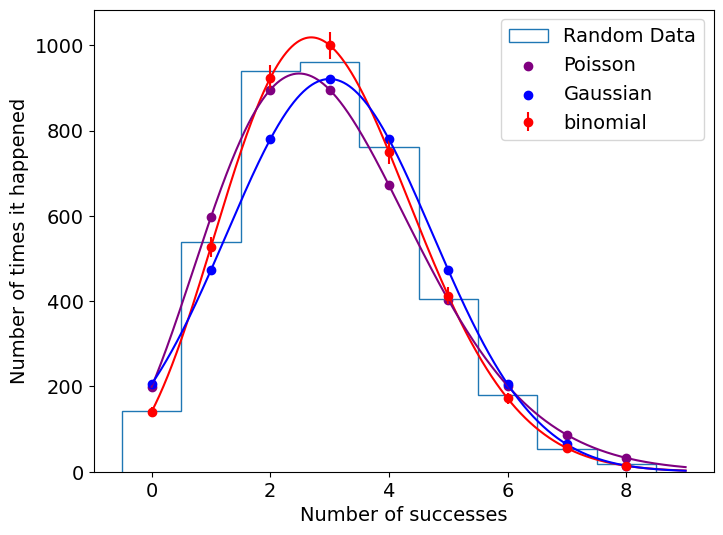

In [74]:
avg=3
p=0.2

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
from random import random

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 8,6

def Poisson(x, mean):
    return np.power(float(mean),x) * np.exp(-mean) / gamma(x+1)

def Gauss(x, mean, width):
    return np.exp(-(x-mean)**2/(2*width**2)) / (width*np.sqrt(2*np.pi))

def binomial(x, N, p):
    return np.power(p,x) * np.power((1-p),(N-x)) * gamma(N+1) / (gamma(x+1) * gamma(N-x+1))

def randomProcess(N, p):
    sum = 0
    for i in range(N):
        if random() < p:
            sum += 1
    return sum

def randomProcessRepeated(num_trials, N, p):
    history = np.zeros(num_trials)
    for i in range(num_trials):
        history[i] = randomProcess(N, p)
    return history


num = 4000
num_bins = int(3*avg)
N = int(avg/p)
x = np.arange(num_bins)
mean = N*p

y_b = num*binomial(x, N, p)   #comment this out to ignore error messages
y_p = num*Poisson(x, mean)
y_g = num*Gauss(x, mean, np.sqrt(mean))
y_r = randomProcessRepeated(num, N, p)

xs = np.linspace(0, num_bins, 1000)
ys_b = num*binomial(xs, N, p)    #comment this out to ignore error messages
ys_p = num*Poisson(xs, mean)
ys_g = num*Gauss(xs, mean, np.sqrt(mean))

bin_range = (-0.5, num_bins-0.5)  # why -0.5 instead of 0?

n1, bins1, _ = plt.hist(y_r, bins=num_bins, range=bin_range, histtype='step', label='Random Data')

plt.errorbar(x, y_b, np.sqrt(y_b), label="binomial", marker="o", color="red", ls="")
plt.plot(xs, ys_b, color="red")
# comment out the above two lines to ignore error messages

plt.scatter(x, y_p, label="Poisson",color="purple",marker="o")
plt.plot(xs, ys_p,color="purple")

plt.scatter(x, y_g, label="Gaussian",color="blue",marker="o")
plt.plot(xs, ys_g, color="blue")
plt.legend()
plt.xlabel("Number of successes")
plt.ylabel("Number of times it happened")
plt.show()



## Histograms

A histogram is a plot, usually a vertical bar chart, that shows the frequency (or number of counts) of a data set on the y-axis and the range of data values (called the bins, or bin widths) for each count on the x-axis. You might plot a histogram of your residuals of a fit to see if your uncertainties are normal. Or you might repeat a measurement many times and plot a histogram to see if its variation is normal. If the results are not normal, you can eyeball the histogram to determine the average and the uncertainty, potentially using the full-width-half-max (FWHM) method where you claim the uncertainty is the witdh of your histogram as measured at half its maximum height. You might want to fit the histogram to the Gaussian function, or a Gaussian function + a background function (which might be a simple constant).

There are two main issues you need to resolve when using histograms. The first is how to determine your uncertainties so you can do a $\chi_{red}^2$ fit. The second is to determine how many bins, or equivalently the bin widths, you should use. We'll look at the first issue first since the second issue is complicated.

### Histogram uncertainties

Normally, a histogram involves a lot of data which is similar, but each data point is technically independent of all the others. That is to say, you're comparing apples to apples, but each apple was grown on a different tree so the size, taste, or whatever you're measuring, of each apple is in principle unrelated to all the other apples except insofar as they are all apples. As such, it is typically reasonable to assume that the count of each bin is an example of a rare, random event. It is thus reasonable to treat each bin as a single measurement drawn from a Poisson distribution of possible results. Your best guess of the "true" value of the bin is whatever your count is, and the square root of the count is your best guess of the standard deviation of the bin.

That means the square root of the count of each bin is a decent guess for its uncertainty in the vertical direction. 

We don't usually talk about the horizontal uncertainties for a few reasons. 1) The horizontal widths of the bars represent bin widths, which is more or less its own sense of an uncertainty. 2) A horizontal uncertainty could represent data points which should have been in a neighbouring bin which affects the count of those bins; we already have a method for estimating the vertical uncertainties. 3) You're likely going to fit your histogram using a least-squares method of fitting which really only cares about the vertical uncertainties anyway, so it's unlikely that you really care about the horizontal uncertainties. This last reason is the most pragmatic, and is by itself a strong enough reason to ignore the vertical uncertainties.

Special consideration should be given to the uncertainties of bins with small counts, especially counts of zero or one. Since $\sqrt{0}=0$, any empty bins have zero uncertainty (using our uncertainty estimator) which is problematic; it implies those values are known exactly. This is wrong. You can fix this by setting the uncertainty of all empty bins to be 1, which is more sensible. However, you should always think very carefully about what you intend to do with your empty, or near-empty, bins. They probably represent noise, so including them in your graph and subsequent data analysis is not clearly useful. We explore this in more detail in the next section.

### Bin widths, or number of bins

Given your dataset, the bin width and the number of bins you use are closely related quantities. We'll mostly discuss bin widths out of convenience, but sometimes the number of bins is more important. Obviously, each bin should have the same width as the others otherwise comparing the counts is not sensible.

Question: what should your bin width be?

Answer: it depends on many factors. We discuss various factors.

1) What are the uncertainties of your data? It seems unwise to make your bin widths smaller than, say, half your uncertainties, otherwise the issue of whether each datum really belongs in a neighbouring bin becomes significant. It may be more reasonable to make your bin widths be equal to, or even double, your uncertainties of your data. Sometimes you might want to make the bin widths much larger than the uncertainties.
2) Make sure your counts (y-axis values) do not get too small. If your counts are 10, then your uncertainties are about 30%, which makes your counts qualify as being only barely non-zero (3-$\sigma$ confidence level). If you take the approach that 5-$\sigma$ represents a definitively non-zero measurement, then any count which is below 25 is not something you trust. The 5-$\sigma$ threshold is a bi strict when applied to histogram counts, but if you have enough data it is worth keeping in mind. If your counts are "too low" you should increase your bin widths.
3) What are the key features of your data? If you want to fit your data to a Gaussian function, which probably has 3 or 4 parameters (depending on whether you expect your data to have a uniform background), then the peak which represents your signal better have more than 4 bins. You probably want at least 10 bins (if not more) to get a good fit. If you have multiple features, you will want each feature to have more than 4 bins. 

When I make histograms, I always redo the plots multiple times, changing the bin widths. It is as much art as science. I try something more or less at random, then make the bins bigger or smaller and see what the differences are. Sometimes a small change to bin widths can have weirdly large impacts. I might recommend starting with point one above, and generally make your bin widths equal to your uncertainties for your first plot. Then, if the graph looks too noisy, or (equivalently) if the highest count is less than 25 (point 2 above), I would make the bins wider, possibly by factors of two until the noisiness looks more reasonable. Finally, when the graph is looking good, I would make sure that the main features I care about have enough data points (point 3 above). If you are lucky, they do, and you are good to go. If you are unlucky, you need to consider the tradeoffs between the three points above... and should probably ask a TA or a professor for help with your graph!

## Fitting your histogram

You have a histogram. It looks good, you are happy with the bin widths. You have counts with uncertainties. Time to fit it! Frequently, the fitting function will be a Gaussian, or perhaps a Gaussian function + a constant to describe "background noise". Sometimes the background noise is not constant and you'll need to figure out a functional form for it. Sometimes you have two or more Gaussians in your data representing different populations. What to do?

Before you begin, remember that the numpy histogram function tells you the bin edges, but when fitting you should use the bin centres for your data values to fit, as well as for where you should draw the errorbars.

First, consider trimming your data. If 90% of your counts are in the middle third of your histogram, maybe you can ignore the left- and right-third of your data. For example, in the "Good" graph (the first one in this document), it might be reasonable to only keep the data in the range $140<x<190$. Another criteria might be to ignore all data with counts less than 3.

Next, ideally, you can create one fitting function which incorporates all the features and apply it to all your data and be done with it. Sometimes, for whatever reason, you can't get that to work. In that case, I recommend working on it piece by piece. Start with the biggest feature in your histogram, by which I mean the feature with the most total counts. Fit just that feature. You may need to restrict your data to a subset of the total range of your histogram to do this. This is a "piece-wise" fitting procedure. Once you get the biggest feature fit you can either subtract that fit from all your data and then fit the "residuals", or you can make a new fitting function which includes your previous fitting function(s) as known values. That is to say, your second fit function includes the first fit function with given (not variable) parameter values which are fixed. You then work on the second largest feature, and so on, with each new feature being small (fewer total counts) and harder to fit well. 

## Example: Gaussian fit of a histogram

Here's the "rare events" code again, this time without the binomial and Poisson distributions, and including both the theoretical (red) Gaussian function and an actual fitted (blue) Gaussian function. The fitted function will usually be slightly different, and will always be slightly better, than the theoretical line. This is because this is a random process (technically, a pseudo-random process) and as such it will never produce an idealized result.

You may be surprised at the high $\chi_{red}^2$ values that sometimes result. I have seen values as high as 1.5, which usually indicates a bad fit. By inspection, we know the fit is good, so why is the $\chi_{red}^2$ value sometimes bad? It's because of the "wings" of the distribution, typically around x=15 or x=45. With bad luck, some of the bins might be near-zero values in which case they are so many errorbars away from the best fit line that one or two such events cause a large increase in the $\chi_{red}^2$ value. This is around the point where the theoretical curve has a value of less than 10 which, as previously discussed, can cause troubles.

If I was being more careful here, I would remove the bins $x<10$ and $x>50$ from my data before fitting, and I would not include them in the plot. I would also consider removing the bins $x<15$ and $x>45$, but it's not clear whether that is necessary.

Question: why did I choose the given bin widths? In this case, the answer is easy: the data came in integers, so integers was reasonable. Any smaller and I would have many empty bins which would be terrible, and would violate consideration 1 about bin widths described above.

Given that most of the data I cared about had counts well above 10 I did not need to make the bins wider, though I could have doubled them so each bin had two integer values. This satisfied consideration 2.

The peak has more than 20 data points currently, so doubling the bin widths would reduce it to 10 data points which is still plenty to do a fit. Increasing the bin width by a factor of 4 would start to get me into trouble with consideration 3 as we would have 5 or 6 data points to fit a Gaussian function (3 paramters). While this does work, it likely increases the uncertainties of the fitting parameters which is obviously something we would prefer to avoid.

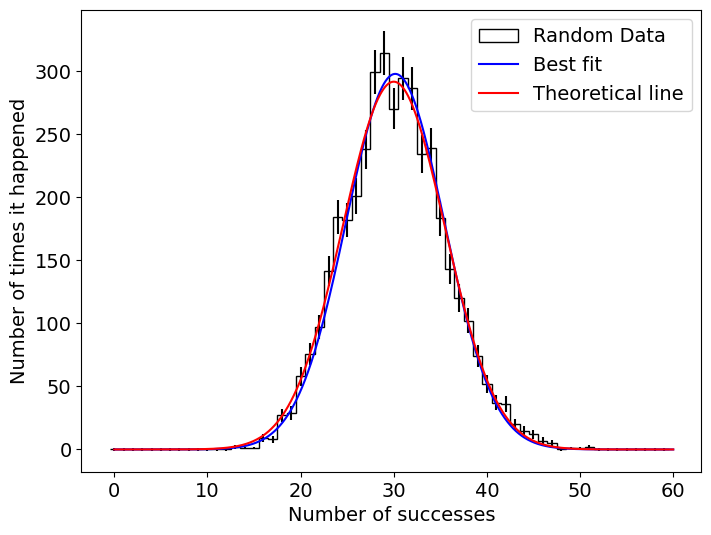

Reduced chi-squared =  1.24


In [63]:
avg=30
p=0.03

import scipy.optimize as optimize
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma
from random import random

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 8,6

def Gauss(x, A, mean, width):
    return A*np.exp(-(x-mean)**2/(2*width**2)) / (width*np.sqrt(2*np.pi))

def randomProcess(N, p):
    sum = 0
    for i in range(N):
        if random() < p:
            sum += 1
    return sum

def randomProcessRepeated(num_trials, N, p):
    history = np.zeros(num_trials)
    for i in range(num_trials):
        history[i] = randomProcess(N, p)
    return history

num = 4000
num_bins = int(2*avg)
N = int(avg/p)
x = np.arange(num_bins)
mean = N*p

y_r = randomProcessRepeated(num, N, p)

bin_range = (-0.5, num_bins-0.5)

n1, bins1, _ = plt.hist(y_r, bins=num_bins, range=bin_range, histtype='step', label='Random Data', color="black")
bin_centres = 0.5*(bins1[1:]+bins1[:-1])

p0=(num, mean, np.sqrt(mean))

sig = np.sqrt(n1)
sig = np.where(sig==0, 1, sig)

popt, pcov = optimize.curve_fit(Gauss, bin_centres, n1, sigma=sig, absolute_sigma=True, p0=p0)
xs = np.linspace(0, num_bins, 1000)
ys = Gauss(xs, *popt)
ys_theory = Gauss(xs, *p0)

plt.errorbar(bin_centres, n1, yerr=sig, fmt='none', color="black")
plt.plot(xs, ys, color="blue", label='Best fit')
plt.plot(xs, ys_theory, color="red", label='Theoretical line')
plt.xlabel("Number of successes")
plt.ylabel("Number of times it happened")
plt.legend()
plt.show()

residual = n1 - Gauss(bin_centres, *popt)
chi2 = sum((residual/sig)**2)/(len(bin_centres)-3)
print("Reduced chi-squared = ", str(chi2)[:4])
